# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [9]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Mohammed, Amro]

[CS 109a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the dependent variable Y, and the second column containing the independent variable X. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

*** 1-a-1 : Implement a funtion split ***

In [36]:
def split(data , m ):
 '''
   Implement a funtion split, which satifies:
     input: an nx2 dataframe data, a float m
     return: an nx2 dataframe train and an nx2 dataframe test, consisting of m percent and 100 - m percent of the data, respectively.
    '''

 msk = np.random.rand(len(data)) < m
 train_set = data[msk]
 test_set =  data[~msk]   
 return train_set, test_set


### Part (b): Course Number

In [37]:
import numpy as np
import pandas as pd
import random

def knn_predict(train_knn,test_knn,k=3):
  estimated_test_knn = pd.DataFrame(columns= ('x','y'))
  estimated_test_knn['x']= test_knn['x']
  estimated_test_knn['y']= 0.0
  train_knn['euclidean_distance'] = 0.0
  for test_index  , test_row in test_knn.iterrows():
     train_knn.loc[:,'euclidean_distance'] = abs(train_knn.loc[:,'x'] - test_row['x'])
     train_knn.sort(['euclidean_distance'],inplace=True)
     estimated_test_knn['y'][test_index] =   train_knn['y'][0:k].mean()
   

  return estimated_test_knn

In [38]:
import numpy as np
import pandas as pd
import random

def linear_reg_fit(train_lr):
 # Estimate the coefficients 
 beta1 =  np.sum((train_lr['x'] - train_lr['x'].mean()) *  (train_lr['y'] - train_lr['y'].mean())) / np.sum ((train_lr['x'] - train_lr['x'].mean()) **2) 
 beta0 =  train_lr['y'].mean() - beta1 * train_lr['x'].mean()
 return beta0, beta1


In [39]:
def linear_reg_predict (test_lr, intercept , slope):
  estimated_test_lr = pd.DataFrame(columns= ('x','y'))
  estimated_test_lr['x']= test_lr['x']
  estimated_test_lr['y']=  intercept + slope* test_lr['x']
  return estimated_test_lr

*** Implement a function score ***

 that satisfies:
 
    input : an nx2 dataframe predicted, an nx2 dataframe actual
 
    return : R^2 coefficient of the fit of the predicted values.

In [42]:
def score (estimated_df, actual_df):
 RSS =  np.sum((actual_df['y'] - estimated_df['y'])**2)
 TSS =  np.sum((actual_df['y'] - actual_df['y'].mean())**2)
 return ((TSS - RSS) / TSS)

### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

*** 1-b-1: Load the contents of dataset_1_full.txt into a pandas dataframe, or numpy array. ***

In [43]:
data  = pd.read_csv('./dataset/dataset_1_full.txt')

*** 1-b-2: Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset. ***

In [44]:

train, test = split(data,0.7)
test_series = pd.DataFrame(test['x'])

estimated_test_using_knn = knn_predict(train, test_series,3)

beta0,beta1 =  linear_reg_fit (train)

estimated_test_using_lr = linear_reg_predict (test_series,beta0,beta1)

print 'lr score  = ' , score (estimated_test_using_lr , test)
print 'knn score = ', score (estimated_test_using_knn , test)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Anaconda\lib\site-packages\pandas\core\frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

lr score  =  0.357404439752
knn score =  0.233014297588


*** 1-b-3: Use sklearn to split the data into training and testing sets (70-30). Use sklearn to evaluate how KNN and linear regression each perform on this dataset. ***

** Use sklearn to split the data into training and testing sets (70-30) **

In [45]:
import numpy as np
from sklearn.cross_validation import train_test_split

x_data = data.loc[:,'x'].values.reshape(len(data), 1)
y_data = data.loc[:,'y'].values

x_train, x_test, y_train, y_test = sk_split(x_data, y_data, test_size=0.33, random_state=42)


In [46]:
'''
train, test = split(data,0.7)
test_series = pd.DataFrame(test['x'])

x_train = train.loc[:,'x'].values.reshape(len(train), 1)
y_train = train.loc[:,'y'].values

x_test  = test.loc[:,'x'].values.reshape(len(test),1)
y_test = test.loc[:,'y'].values
'''

"\ntrain, test = split(data,0.7)\ntest_series = pd.DataFrame(test['x'])\n\nx_train = train.loc[:,'x'].values.reshape(len(train), 1)\ny_train = train.loc[:,'y'].values\n\nx_test  = test.loc[:,'x'].values.reshape(len(test),1)\ny_test = test.loc[:,'y'].values\n"

*** Use sklearn to evaluate how Linear Regression ***

In [47]:
def sklearn_linear_reg_predict(x_train, x_test, y_train, y_test):

 # import linear model
 from sklearn.linear_model import LinearRegression as Lin_Reg
 # create linear model
 regression = Lin_Reg ( )
 # fitlinear model
 regression.fit(x_train ,y_train )
 # predicty values
 predicted_y = regression.predict(x_test)
 # score predictions
 r_2 = regression.score (x_test , y_test )
 
 return r_2

*** Use sklearn to evaluate how KNN ***

In [48]:
def sklearn_KNN_predict(x_train, x_test, y_train, y_test ,  k):
    
 # import KNN regressor model
 from sklearn.neighbors import KNeighborsRegressor as KNN

 # creates KNN model for k-nearest neighbor comparison
 neighbours = KNN(n_neighbors = k )
 # fit() sets the parameters of the model ( with training data )
 neighbours.fit(x_train,y_train )

 # predict test response values given test predictor
 predicted_y = neighbours.predict(x_test)
 # calculates R^2 of predicted response vs test response
 r_2 = neighbours.score (x_test,y_test)

 return r_2

*** 1-b-4 : Use Python's time library to measure how well your implementations compare with that of sklearn. What can you do (algorithmically or codewise) to make your implementation faster or more efficient? ***

In [53]:
import time

data  = pd.read_csv('./dataset/dataset_2_full.txt')


train, test = split(data,0.7)

start = time.time()
test_series = pd.DataFrame(test['x'])
estimated_test_using_knn = knn_predict(train, test_series,3)
manual_KNN_r2 = score (estimated_test_using_knn , test)
end = time.time()
print 'manual_KNN_predict Time                =' , (end - start)   ,  '      With R^2   =  ' , manual_KNN_r2


start = time.time()
beta0,beta1 =  linear_reg_fit (train)
estimated_test_using_lr = linear_reg_predict (test_series,beta0,beta1)
manual_RL_r2 =   score (estimated_test_using_lr , test)
end = time.time()

print 'manual linear regression predict time  = ', (end - start)   ,  '   With R^2   =  ' , manual_RL_r2



x_data = data.loc[:,'x'].values.reshape(len(data), 1)
y_data = data.loc[:,'y'].values
x_train, x_test, y_train, y_test = sk_split(x_data, y_data, test_size=0.33, random_state=42)



start = time.time()
sklearn_KNN_r2 = sklearn_KNN_predict(x_train, x_test, y_train, y_test ,  3)
end = time.time()
print 'sklearn_KNN_predict Time               =' , (end - start)   ,  '    With R^2   =  ' , sklearn_KNN_r2


start = time.time()
sklearn_RL_r2 = sklearn_linear_reg_predict(x_train, x_test, y_train, y_test)
end = time.time()
print 'sklearn_linear_reg_predict Time        =' , (end - start)   ,  '   With R^2   =  ' , sklearn_RL_r2





C:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


manual_KNN_predict Time                = 13.6240000725       With R^2   =   0.924558147359
manual linear regression predict time  =  0.00300002098083    With R^2   =   0.835345715657
sklearn_KNN_predict Time               = 0.000999927520752     With R^2   =   0.920664880222
sklearn_linear_reg_predict Time        = 0.00100016593933    With R^2   =   0.821073298418


** What can you do (algorithmically or codewise) to make your implementation faster or more efficient? **

- The main bottle neck exist in manual KNN algorithm  and this is happen becuase for each item in the test data set we have loop across all Training data set , in my code made to preformance enhancement 

1- instead of making inner loop for train data set I used the data frame directly to calculate the euclidean distance.
   
    train_knn.loc[:,'euclidean_distance'] = abs(train_knn.loc[:,'x'] - test_row['x'])
    
2- instead of making loop to calculate the best value of KNN I used the mean funcation with datafram slicing

    estimated_test_knn['y'][test_index] =   train_knn['y'][0:k].mean()
    
    
- I still think that you can enhance the sort step , and I beleive that the most delay came form this step

     train_knn.sort(['euclidean_distance'],inplace=True)


## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the dependent variable Y, and the second column containing the independent variable X. 

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

In [54]:
#--------  fill_knn
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)

def fill_knn(missing_df, full_df, no_y_ind, with_y_ind, k):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values
    x_train = x_train.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit knn model
    neighbours = KNN(n_neighbors=k)
    neighbours.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = neighbours.predict(x_test)
    
    #score predictions
    r = neighbours.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

#--------  fill_ling_reg
#input: missing_df (dataframe), full_df (dataframe), no_y_ind (indices of missing values), 
#       with_y_ind (indices of non-missing values), k (integer)
#output: predicted_df (dataframe), r (float)


def fill_lin_reg(missing_df, full_df, no_y_ind, with_y_ind):
    #preparing data in array form
    x_train = missing_df.loc[with_y_ind, 'x'].values.reshape((len(with_y_ind), 1))
    y_train = missing_df.loc[with_y_ind, 'y'].values
    x_test = missing_df.loc[no_y_ind, 'x'].values.reshape((len(no_y_ind), 1))
    y_test = full_df.loc[no_y_ind, 'y'].values
    
    #fit linear model
    regression = Lin_Reg()
    regression.fit(x_train, y_train)
    
    #predict y-values
    predicted_y = regression.predict(x_test)
    
    #score predictions
    r = regression.score(x_test, y_test)
    
    #fill in missing y-values
    predicted_df = missing_df.copy()
    predicted_df.loc[no_y_ind, 'y'] = pd.Series(predicted_y, index=no_y_ind)
    
    return predicted_df, r

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

In [55]:
#--------  plot_missing
#input: ax1 (axes), ax2 (axes), 
#       predicted_knn (nx2 dataframe with predicted vals), r_knn (float),
#       predicted_lin (nx2 dataframe with predicted vals), r_lin (float), 
#       k (integer),
#       no_y_ind (indices of rows with missing y-values),
#       with_y_ind (indices of rows with no missing y-values)
#output: ax1 (axes), ax2 (axes)

def plot_missing(ax1, ax2, predicted_knn, r_knn, predicted_lin, r_lin, k, no_y_ind, with_y_ind):
    ax1.scatter(predicted_knn.loc[with_y_ind]['x'].values, 
                predicted_knn.loc[with_y_ind]['y'].values, 
                color='blue')

    ax1.scatter(predicted_knn.loc[no_y_ind]['x'].values, 
                predicted_knn.loc[no_y_ind]['y'].values, 
                color='red')

    ax1.set_title('KNN, R^2:' + str(r_knn))

    ax2.scatter(predicted_lin.loc[with_y_ind]['x'].values, 
                predicted_lin.loc[with_y_ind]['y'].values,
                color='blue')

    ax2.scatter(predicted_lin.loc[no_y_ind]['x'].values, 
                predicted_lin.loc[no_y_ind]['y'].values, 
                color='green')

    ax2.set_title('Lin Reg, R^2:' + str(r_lin))
    
    return ax1, ax2

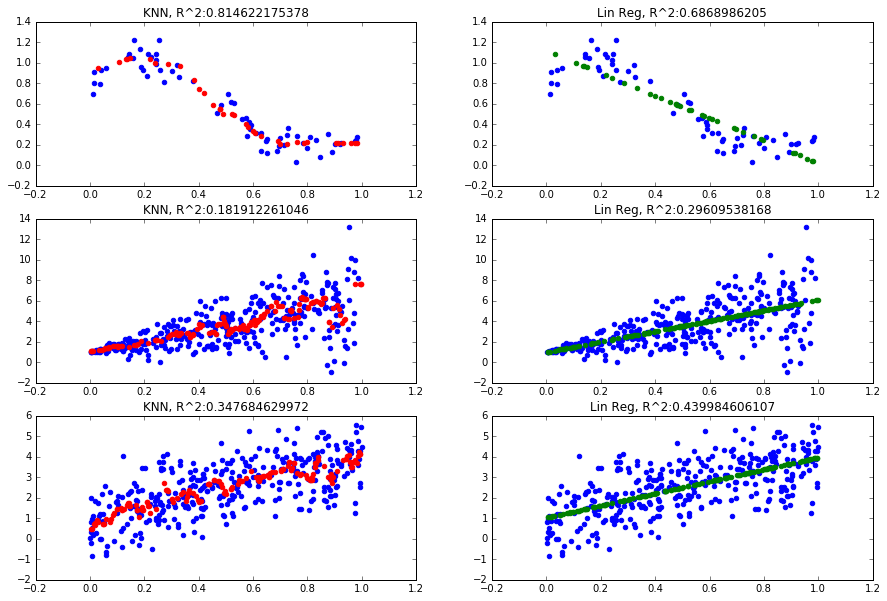

In [56]:
#number of neighbours
k=10

### CODING TIP: You have to generate data for six different datasets, is it a good idea
### to copy and paste the same block of code over and over again for six times? 
### How can you get around this?
### For HW2 it's still ok to copy and paste, for HW3, we will need you to see where functional
### abstraction and iteration are called for and implement them.


#plot predicted points
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))


#Read dataset 1
missing_df = pd.read_csv('./dataset/dataset_1_missing.txt')
full_df = pd.read_csv('./dataset/dataset_1_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax5, ax6 = plot_missing(ax5, 
                        ax6, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

#Read dataset 4
missing_df = pd.read_csv('./dataset/dataset_4_missing.txt')
full_df = pd.read_csv('./dataset/dataset_4_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax1, ax2 = plot_missing(ax1, 
                        ax2, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

#Read dataset 6
missing_df = pd.read_csv('./dataset/dataset_6_missing.txt')
full_df = pd.read_csv('./dataset/dataset_6_full.txt')

no_y_ind = missing_df[missing_df['y'].isnull()].index
with_y_ind = missing_df[missing_df['y'].notnull()].index

predicted_knn, r_knn = fill_knn(missing_df, 
                                full_df, 
                                no_y_ind, 
                                with_y_ind, 
                                k)

predicted_lin, r_lin = fill_lin_reg(missing_df, 
                                    full_df, 
                                    no_y_ind, 
                                    with_y_ind)

ax3, ax4 = plot_missing(ax3, 
                        ax4, 
                        predicted_knn, r_knn,
                        predicted_lin, r_lin,
                        k,
                        no_y_ind, 
                        with_y_ind)

plt.show()

**Outline of Analysis: Add more, expand and fill out in your own words**

- From the scatter plots we see that the advantage of KNN is that it tends to perform better when the data is not linear and when the shape of the distribution is odd. On the other hand, when the data is "linear", whatever that means, linear regression performs better than KNN (even with a high choice of $k$). 

- So when does the KNN model fail? If the nearest neighbours are very disimilar to a point, then the prediction won't be very good (explain why this is true!). When the nearest neighbours show extreme variation KNN also does poorly.

**Note:** before exploring the data, it is hard to say before hand that KNN will fail/has failed; and when it does it may be difficult to see why when the data is high dimensional (hard to visualize). It's also not clear which $k$ to use.

---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the dependent variable Y, and the second column containing the independent variable X. 

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal? 


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

In [10]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

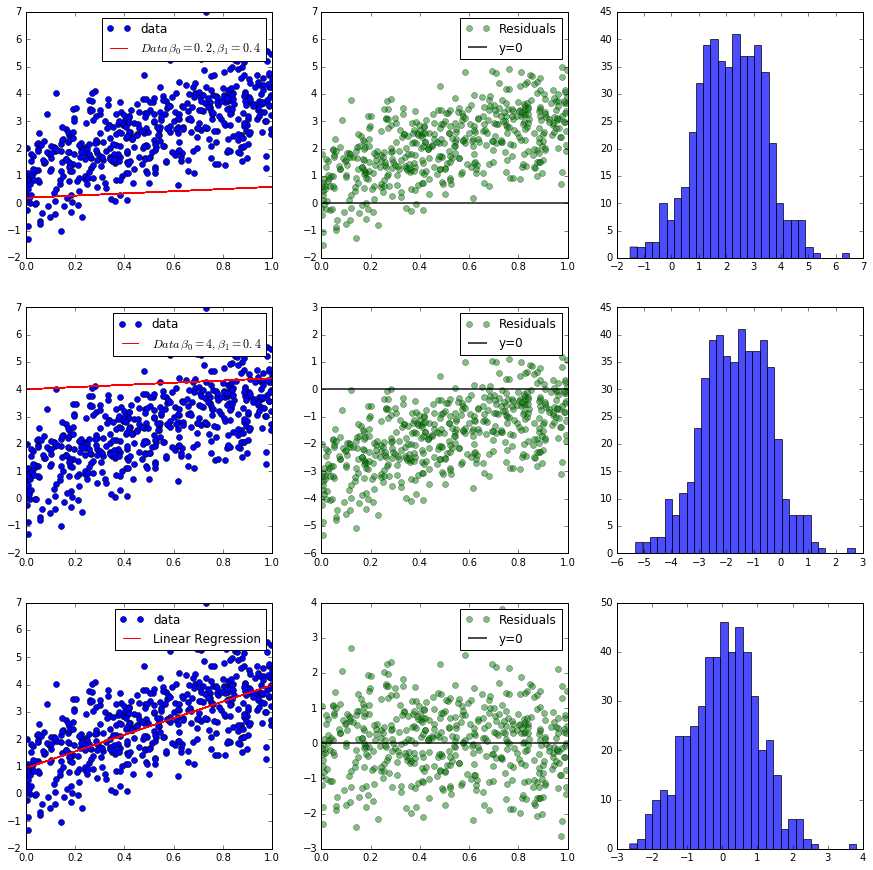

In [43]:
data2  = pd.read_csv('./dataset/dataset_1_full.txt')

fig, ((ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 15))
#fig, (ax1, ax2, ax3 , ax4, ax5, ax6 ,ax7, ax8, ax9) = plt.subplots(3, 3, figsize=(15, 15))


'''
ax1.plot(X,Y, 'o', label=r'$Data \, \beta_0=2.2, \beta_1=3.0$')
ax4.plot(X,Y, 'o', label=r'$Data \, \beta_0=2.2, \beta_1=3.0$')

ax1.plot(X, Y_h, color='r', label="Prediction")
ax1.legend()

ax2.set_title("Residuals")
ax2.plot(X,e, 'go', alpha=0.5, label='Residuals')
ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
ax2.legend()

ax3.hist( e, bins=30, alpha=0.7);
'''
x= data2.loc[:,'x'].values
y= data2.loc[:,'y'].values

# first model
# slope = 0.4, intercept = 0.2
y_h1 = 0.2 + (0.4 *x )
e = y - y_h1

ax1.plot(x,y,'o', label = 'data')
ax1.plot(x,y_h1,'r', label =  r'$Data \, \beta_0=0.2, \beta_1=0.4$')
ax1.legend()


ax2.plot(x,e,'go',alpha=0.5,label='Residuals')
ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
ax2.legend()

ax3.hist (e,bins=30,alpha= 0.7)
#ax3.title ('Residuals histogram')


# Second  model
# slope = 0.4, intercept = 4
y_h2 = 4 + (0.4 *x )
e = y - y_h2

ax4.plot(x,y,'o', label = 'data')
ax4.plot(x,y_h2,'r', label =  r'$Data \, \beta_0= 4, \beta_1=0.4$')
ax4.legend()


ax5.plot(x,e,'go',alpha=0.5,label='Residuals')
ax5.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
ax5.legend()

ax6.hist (e,bins=30,alpha= 0.7)


# third  model
# Linear regression

x_data = data2.loc[:,'x'].values.reshape(len(data2), 1)
y_data = data2.loc[:,'y'].values
x_train, x_test, y_train, y_test = sk_split(x_data, y_data, test_size=0.33, random_state=42)
regression = Lin_Reg ()
 # fitlinear model
regression.fit(x_train ,y_train )
 # predicty values
y_h3 = regression.predict(x_data)
ax7.plot(x,y,'o', label = 'data')
ax7.plot(x,y_h3 ,'r', label = 'Linear Regression')
ax7.legend()

e = y_data - y_h3
ax8.plot(x,e,'go', alpha=0.5,label = 'Residuals')
ax8.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')
ax8.legend()

ax9.hist(e, bins=30,alpha=0.7)


plt.show()

In [44]:
def calculate_r_2(y_actual , y_hat):
 RSS =  np.sum((y_actual - y_hat)**2)
 TSS =  np.sum((y_actual - y_actual.mean())**2)
 return ((TSS - RSS) / TSS)

In [47]:
print 'R^2 for model 1  : ' ,  calculate_r_2 (y,y_h1)
print 'R^2 for model 2  : ' ,  calculate_r_2 (y,y_h2)
print 'R^2 for model 3  : ' ,  calculate_r_2 (y,y_h3)

R^2 for model 1  :  -2.54429006179
R^2 for model 2  :  -1.49677532281
R^2 for model 3  :  0.428835869616


### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit of the linear regression model, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

In [58]:
for i in range(6):
 file_name = './dataset/dataset_'+str(i+1)+'_full.txt'
 data_q3  = pd.read_csv(file_name)
 print file_name   
 print data_q3.head()   


./dataset/dataset_1_full.txt
          x         y
0  0.177418  1.401178
1  0.573076  3.489890
2  0.503775  1.684924
3  0.594027  3.898209
4  0.335754  2.878410
./dataset/dataset_2_full.txt
          x         y
0  0.408443  0.292108
1  0.640883  8.941639
2  0.637759  8.081086
3  0.581426  6.263709
4  0.772800  7.879239
./dataset/dataset_3_full.txt
          x          y
0  0.121384  -3.568853
1  0.160069   5.373957
2  0.004706  -4.441018
3  0.571459  10.261394
4  0.259522  -3.862360
./dataset/dataset_4_full.txt
          x        y
0  0.016353  0.91325
1  0.727570  0.36886
2  0.627700  0.14077
3  0.832000  0.24985
4  0.163920  1.22470
./dataset/dataset_5_full.txt
         x        y
0  0.21376  0.87153
1  0.29810  0.66928
2  0.76834  1.17930
3  0.50115  1.33250
4  0.90946  2.39960
./dataset/dataset_6_full.txt
          x         y
0  0.665138  2.222823
1  0.008478  1.084748
2  0.832568  4.798851
3  0.168644  2.147488
4  0.652890  5.440666


---

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**

---